In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_rent = pd.read_json('renttherunway_final_data.json.gz', compression='gzip', lines=True)
print(len(df_rent))
df_rent.head()

192544


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### Imputating Missing Values

In [50]:
# nan present in 24% of rows -> will need to imputate values
len(df_rent.dropna())/len(df_rent)

0.7602470084759847

In [17]:
df_rent.isnull().any()

fit               False
user_id           False
bust size         False
item_id           False
weight             True
rating             True
rented for         True
review_text       False
body type          True
review_summary    False
category          False
height             True
size              False
age                True
review_date       False
dtype: bool

In [44]:
#imputating missing values

df_rent["bust size"] = df_rent["bust size"].fillna("Unknown")
df_rent["weight"] = df_rent["weight"].fillna("Unknown")
df_rent["rented for"] = df_rent["rented for"].fillna("other")
df_rent["body type"] = df_rent["body type"].fillna(df_rent["body type"].mode()[0])
df_rent["rating"] = df_rent["rating"].fillna(df_rent["rating"].mode()[0])
df_rent["age"] = df_rent["age"].fillna(df_rent["age"].median())
df_rent["height"] = df_rent["height"].fillna(df_rent["height"].mode()[0])

fit               False
user_id           False
bust size         False
item_id           False
weight            False
rating            False
rented for        False
review_text       False
body type         False
review_summary    False
category          False
height            False
size              False
age               False
review_date       False
dtype: bool

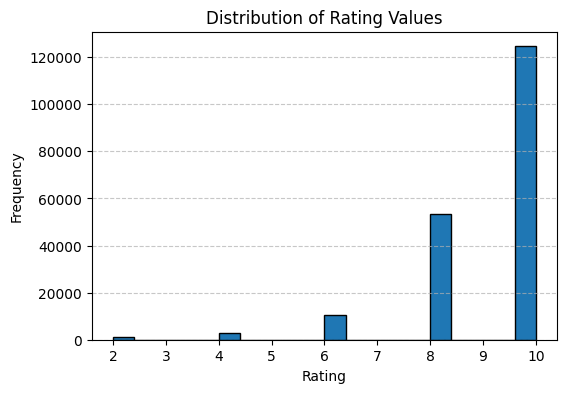

In [51]:
### To add to EDA

plt.figure(figsize=(6, 4))
plt.hist(df_rent['rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
### Baseline model